In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import joblib

In [ ]:
# Load dataset gabungan
dataset_path = '/content/drive/MyDrive/dataset/Combined_Dataset.csv'
data = pd.read_csv(dataset_path)

In [ ]:
# Periksa beberapa baris dataset
print(data.head())

# Pastikan tidak ada nilai NaN
data.dropna(subset=['text', 'label'], inplace=True)

# Split data menjadi teks (X) dan label (y)
X = data['text']
y = data['label']


                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  ID tanggal judul narasi nama file gambar  
0  December 31, 2017      1 NaN     NaN   NaN    NaN              NaN  
1  December 31, 2017      1 NaN     NaN   NaN    NaN              NaN  
2  December 30, 2017      1 NaN     NaN   NaN    NaN          

cek 1 dan 0

In [ ]:
# Cek distribusi label
print(data['label'].value_counts())


label
1    23481
0    21417
Name: count, dtype: int64


cleaning

In [ ]:
import re
from nltk.corpus import stopwords
import nltk

# Download stopwords (hanya perlu dilakukan sekali)
nltk.download('stopwords')

# Stopwords
stop_words_id = set(stopwords.words('indonesian'))
stop_words_en = set(stopwords.words('english'))

# Fungsi untuk membersihkan teks
def clean_text(text, language='en'):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    stop_words = stop_words_id if language == 'id' else stop_words_en
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Bersihkan teks berdasarkan label bahasa
data['cleaned_text'] = data.apply(
    lambda row: clean_text(row['text'], 'id') if 'indonesian' in row['text'].lower() else clean_text(row['text'], 'en'),
    axis=1
)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


membagi data train-test

In [ ]:
from sklearn.model_selection import train_test_split

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(
    data['cleaned_text'], data['label'], test_size=0.25, random_state=42
)

 TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Melatih Model

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

# Model Passive Aggressive Classifier
model = PassiveAggressiveClassifier(max_iter=50)
model.fit(X_train_tfidf, y_train)


PassiveAggressiveClassifier(max_iter=50)

Evaluasi Model

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5330
           1       0.99      1.00      1.00      5895

    accuracy                           1.00     11225
   macro avg       1.00      0.99      0.99     11225
weighted avg       1.00      1.00      1.00     11225

Accuracy: 1.00
Precision: 0.99
Recall: 1.00
F1 Score: 1.00


<ipython-input-22-9a4ad8c567bb>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='Blues_d')


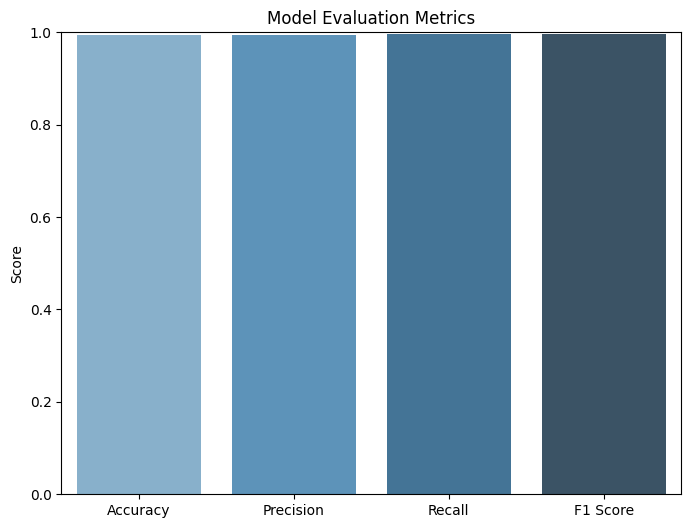

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Prediksi
y_pred = model.predict(X_test_tfidf)

# Evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Mencetak Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Menampilkan metrik
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Visualisasi
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=values, palette='Blues_d')

# Menambahkan label dan judul
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)

# Menampilkan plot
plt.show()

menyimpan model

In [ ]:
import joblib

# Simpan model dan vectorizer
joblib.dump(model, '/content/drive/MyDrive/Model/model.sav')
joblib.dump(tfidf_vectorizer, '/content/drive/MyDrive/Model/vectorizer.sav')
print("Model dan vectorizer berhasil disimpan.")

Model dan vectorizer berhasil disimpan.
